<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/cc-logo-square.png" width="200" alt="cognitiveclass.ai logo" />

<p>Crack detection has vital importance for structural health monitoring and inspection. We would like to train a network to detect Cracks, we will denote the images that contain cracks as positive and images with no cracks as negative.  In this lab you are going to have to download the data and study the dataset.
There are two questions in this lab, including listing the path to some of the image files as well as plotting a few images. Remember  the results as you will be quizzed on them.  .</p>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">


<ul>
    <li><a href="#download_data"> Download data</a></li>
    <li><a href="#auxiliary"> Imports and Auxiliary Functions </a></li>
    <li><a href="#examine_files">Examine Files</a></li>
    <li><a href="#Question_1">Question 1 </a></li>
    <li><a href="#Display">Display and Analyze Image With No Cracks    </a></li>
    <li><a href="#Question_2">Question 2 </a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>
 </div>
<hr>


<h2 id="download_data">Download Data</h2>

In this section, you are going to download the data from IBM object storage using <b>wget</b>, then unzip them.  <b>wget</b> is a command the retrieves content from web servers, in this case its a zip file. Locally we store the data in the directory  <b>/resources/data</b> . The <b>-p</b> creates the entire directory tree up to the given directory.

First, we download the file that contains the images:

In [7]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip 

--2020-01-27 12:46:33--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245259777 (234M) [application/zip]
Saving to: ‘concrete_crack_images_for_classification.zip.1’

concrete_crack_imag 100%[===================>] 233.90M  2.34MB/s    in 27s     

2020-01-27 12:47:01 (8.53 MB/s) - ‘concrete_crack_images_for_classification.zip.1’ saved [245259777/245259777]



We then unzip the file, this ma take a while:

In [8]:
!unzip -q  concrete_crack_images_for_classification.zip

We then download the files that contain the negative images:

<h2 id="auxiliary">Imports and Auxiliary Functions</h2>

The following are the libraries we are going to use for this lab:

In [9]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas
import matplotlib.pylab as plt
import os
import glob
import torch
from torch.utils.data import Dataset


We will use this function in the lab to plot:

In [10]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

<h2 id="examine_files">Examine Files </h2>

In this section we are going to get a list of the negative image files, then plot them. Then for the first question your job to do something similar to the positive files. 

The path to all the images are stored in the variable  <code>directory</code>. 

In [11]:
directory=os.getcwd()

The images with out the cracks are stored in the file <b>Negative</b>

In [12]:
negative='Negative'

We can find the path to the file with all the negative images by  using the function <code>os.path.join</code>. Inputs are the variable directory as well as the variable  <code>negative</code>.

In [13]:
negative_file_path=os.path.join(directory,negative)
negative_file_path

'/home/george/Downloads/IBM AI Course/capstone project/week2/Negative'

<h3> Loading the File Path of Each Image </h3>

We need each the path of each image, we can find the all the file in the directory  <code>negative_file_path</code> using the function <code>os.listdir</code>, the result is a list. We print out the first three elements of the list.

In [14]:
 os.listdir(negative_file_path)[0:3]

['15993.jpg', '04020.jpg', '08203.jpg']

We need the full path of the image so we join them as above. Here are a few samples  three samples:

In [15]:
[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path)][0:3]

['/home/george/Downloads/IBM AI Course/capstone project/week2/Negative/15993.jpg',
 '/home/george/Downloads/IBM AI Course/capstone project/week2/Negative/04020.jpg',
 '/home/george/Downloads/IBM AI Course/capstone project/week2/Negative/08203.jpg']

In some cases, we may have files of a different type, so we have to ensure it's of type <b>jpg</b>. We have to check the extension using the method <code> endswith()</code>. The method  <code>endswith()</code> returns True if the string ends with the specified suffix, otherwise, it will return False. Let's do a quick example: 

In [16]:
print("test.jpg".endswith(".jpg"))
print("test.mpg".endswith(".jpg"))

True
False


We now have all the tools to create a list with the path to each image file.  We use a List Comprehensions  to make the code more compact. We assign it to the variable <code>negative_files<code> , sort it in and display the first three elements:

In [17]:
negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
negative_files.sort()
negative_files[0:3]

['/home/george/Downloads/IBM AI Course/capstone project/week2/Negative/00001.jpg',
 '/home/george/Downloads/IBM AI Course/capstone project/week2/Negative/00002.jpg',
 '/home/george/Downloads/IBM AI Course/capstone project/week2/Negative/00003.jpg']



<h2 id="Question_1">Question 1</h2>

<b>Using the procedure above, load all the images with cracks paths into a list called positive files, the directory of these images is called Positive.  Make sure the list is sorted and display the first three elements of the list you will need this for the question so remember it.</b>

In [18]:
positive="Positive"
positive_file_path=os.path.join(directory,positive)
positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
positive_files.sort()

<h2 id="Display">Display and Analyze Image With No Cracks</h2>

We can open an image by using the <code>Image</code> Module in the  <b>PIL</b> library, using the function open. We only require the image path; the input is the path of the image. For example we can load the first image as follows:

In [19]:

image1 = Image.open(negative_files[0])
# you can view the image directly 
#image 

we can plot the image

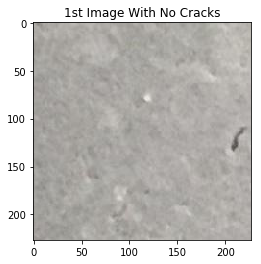

In [20]:
plt.imshow(image1)
plt.title("1st Image With No Cracks")
plt.show()

We can also plot the second image.

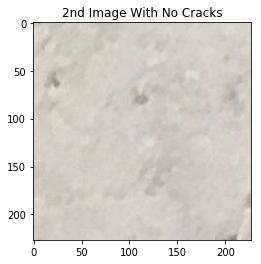

In [21]:
image2 = Image.open(negative_files[1])
plt.imshow(image2)
plt.title("2nd Image With No Cracks")
plt.show()

<h2 id="Question_2">Question 2</h2>

<b>Plot the first three images for the dataset with cracks. Don't forget. You will be asked in the quiz, so remember the image. </b>



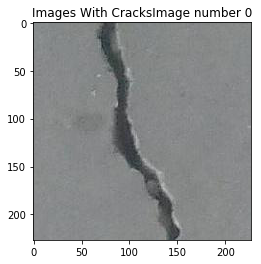

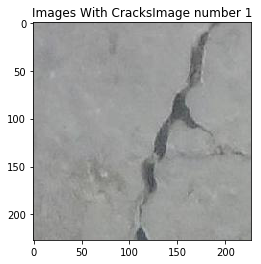

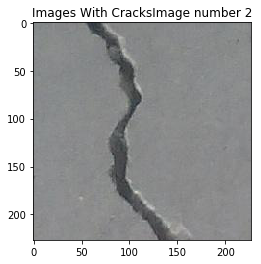

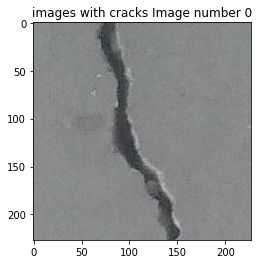

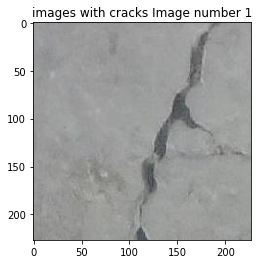

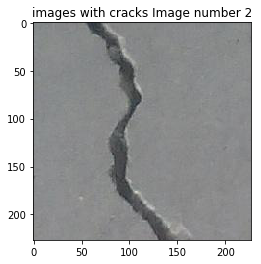

In [23]:
img_s = [0,1,2]
for el in img_s:
    image_s = Image.open(positive_files[el])
    plt.imshow(image_s)
    plt.title("Images With Cracks" + 'Image number ' +str(el))
    plt.show()
    
    
for i in range(3):
    zo=Image.open(positive_files[i])
    plt.imshow(zo)
    plt.title('images with cracks'+ ' Image number '+ str(i))
    plt.show()

<hr>

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

 [Alex Aklson](https://www.linkedin.com/in/aklson/). Ph.D., is a data scientist in the Digital Business Group at IBM Canada. Alex has been intensively involved in many exciting data science projects such as designing a smart system that could detect the onset of dementia in older adults using longitudinal trajectories of walking speed and home activity. Before joining IBM, Alex worked as a data scientist at Datascope Analytics, a data science consulting firm in Chicago, IL, where he designed solutions and products using a human-centred, data-driven approach. Alex received his Ph.D. in Biomedical Engineering from the University of Toronto.

In [149]:
number_of_samples = len(positive_files) + len(negative_files)

In [150]:
number_of_samples

40000

#Assign labels to images
In this section we will assign a label to each image in this case we can assign the positive images, i.e images with a crack to a value one and the negative images i.e images with out a crack to a value of zero Y. First we create a tensor or vector of zeros, each element corresponds to a new sample. The length of the tensor is equal to the number of samples.

In [151]:
Y=torch.zeros([number_of_samples])

In [152]:
Y=Y.type(torch.LongTensor)
Y.type()

'torch.LongTensor'

In [153]:
Y

tensor([0, 0, 0,  ..., 0, 0, 0])

With respect to each element we will set the even elements to class one and the odd elements to class zero.

In [154]:
Y[::2]=1
Y[1::2]=0

In [155]:
Y

tensor([1, 0, 1,  ..., 0, 1, 0])

Question 2¶
Create a list all_files such that the even indexes contain the path to images with positive or cracked samples and the odd element contain the negative images or images with out cracks. Then use the following code to print out the first four samples.

In [156]:
all_files = [None]*number_of_samples
all_files[::2]=positive_files
all_files[1::2]=negative_files
all_files[0:4]        

['/home/george/Downloads/IBM AI Course/capstone project/week 1/Positive/00001.jpg',
 '/home/george/Downloads/IBM AI Course/capstone project/week 1/Negative/00001.jpg',
 '/home/george/Downloads/IBM AI Course/capstone project/week 1/Positive/00002.jpg',
 '/home/george/Downloads/IBM AI Course/capstone project/week 1/Negative/00002.jpg']

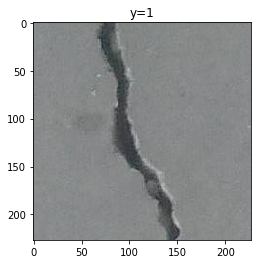

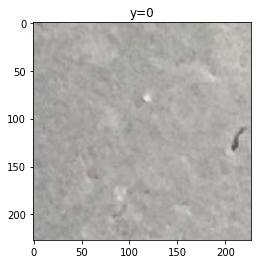

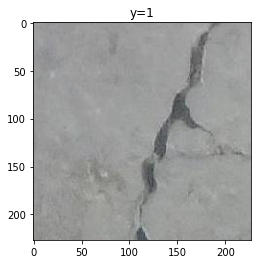

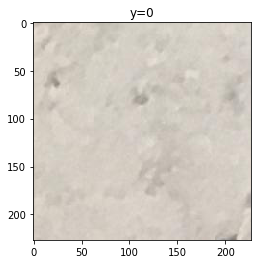

In [157]:
#code for printing samples
for y,file in zip(Y, all_files[0:4]):
    plt.imshow(Image.open(file))
    plt.title("y="+str(y.item()))
    plt.show()

# Training and Validation Split 
When training the model we split up our data into training and validation data. It If the variable train is set to True the following lines of code will segment the tensor Y such at the first 30000 samples are used for training. If the variable train is set to False the remainder of the samples will be used for validation data.

In [158]:
train=True

if train:
    all_files=all_files[0:30000]
    Y=Y[0:30000]

else:
    all_files=all_files[30000:]
    Y=Y[30000:]

# Question 3¶
Modify the above lines of code such that if the variable train is set to True the first 30000 samples of all_files are use in training. If train is set to False the remaining samples are used for validation. In both cases reassign the values to the variable all_files, then use the following lines of code to print out the first four validation sample images.

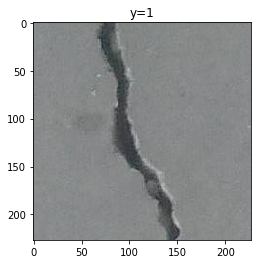

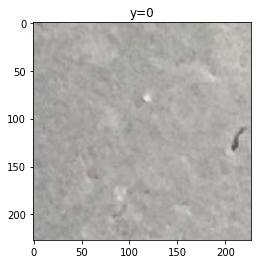

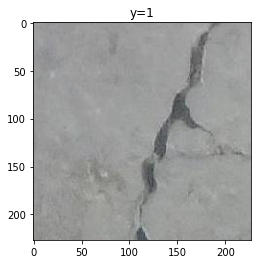

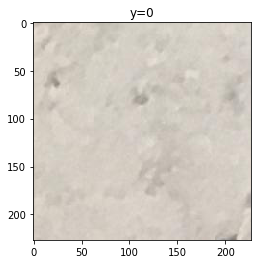

In [159]:
#code for printing samples
for y,file in zip(Y, all_files[0:4]):
    plt.imshow(Image.open(file))
    plt.title("y="+str(y.item()))
    plt.show()

# Create a Dataset Class¶
In this section, we will use the previous code to build a dataset class.

Complete the code to build a Dataset class dataset. As before, make sure the even samples are positive, and the odd samples are negative. If the parameter train is set to True, use the first 30 000 samples as training data; otherwise, the remaining samples will be used as validation data.

In [160]:
class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        directory=os.getcwd()
        positive="Positive"
        negative="Negative"

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
        positive_files.sort()
        negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
        negative_files.sort()

        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files 
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:

            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:

            self.Y=self.Y[30000:]
            self.len=len(self.all_files)
    
  
            
     
       
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        
        image=Image.open(self.all_files[idx])
        y=self.Y[idx]
          
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

# Question 4¶
Create a Dataset object dataset for the training data, use the following lines of code to print out sample the 10th and sample 100 (remember zero indexing)

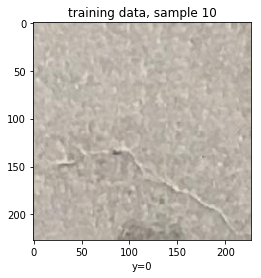

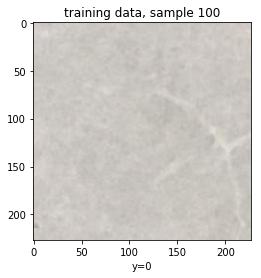

In [165]:
dataset = Dataset(transform=None,train=True)
samples =dataset.all_files
y = dataset.Y

for i,el in enumerate(samples):
    if i==9 or i==99:
        plt.imshow(dataset[i][0])
        plt.xlabel("y="+str(dataset[i][1].item()))
        plt.title("training data, sample {}".format(int(i+1)))
        plt.show()


# Question 5
Create a Dataset object dataset for the validation data, use the following lines of code to print out the 16 th and sample 103 (remember zero indexing)

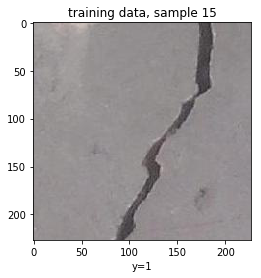

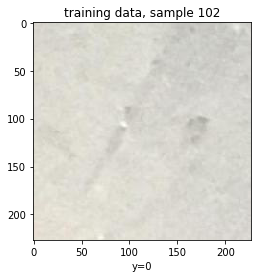

In [133]:
dataset = Dataset(transform=None,train=False)
samples =dataset.all_files
y = dataset.Y

for i,el in enumerate(samples):
    if i==14 or i==101:
        plt.imshow(dataset[i][0])
        plt.xlabel("y="+str(dataset[i][1].item()))
        plt.title("training data, sample {}".format(int(i+1)))
        plt.show()
